# <center> PML Project DSB (2022-2023)

## <h2 align='right'> Work Done by : Wissem Bellara

## I. Data Exploration

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### 2. Reading csv file

In [2]:
data = pd.read_csv('Health Insurance Lead Prediction Raw Data.csv')
data.head() #Show first 5 lines

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


### 3. Exploring the dataframe including column types and their values

In [3]:
data.info() #Types of Columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [4]:
data.describe() #Show count, mean, standard deviation, min, 1st quartile, Median, 3rd quartile and max

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [5]:
data.shape #Show number of lines shape[0] and number of columns shape[1]

(50882, 14)

In [6]:
data.isnull().sum() #Show number of empty instances in each column

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

## II. Data Cleaning

### 1. Dealing with missing values

In [7]:
data['Health Indicator'].value_counts(dropna=False) #Show values in the Health Indicator column

X1     13010
NaN    11691
X2     10332
X3      6762
X4      5743
X5      1727
X6      1280
X7       196
X8        78
X9        63
Name: Health Indicator, dtype: int64

In [8]:
data['Health Indicator'].fillna(data['Health Indicator'].mode()[0], inplace = True) #Fill empty values with the mode value of Health Indicator
data['Health Indicator'].isnull().sum() #Show that all empty values have been replaced

0

In [9]:
data['Holding_Policy_Duration'].replace({'14+':14.0}, inplace = True) #Repalce 14+ value with 14 float

In [10]:
data['Holding_Policy_Duration'] = data['Holding_Policy_Duration'].astype('float32') #Change the type of the Holding Policy Duration columnn

In [11]:
data['Holding_Policy_Duration'].fillna(data['Holding_Policy_Duration'].median(), inplace = True) #Fill empty values with the median value of Holding_Policy_Duration
data['Holding_Policy_Duration'].isnull().sum()

0

In [12]:
data['Holding_Policy_Type'].value_counts(dropna=False) #Show values in the Holding_Policy_Type column

NaN    20251
3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [13]:
data['Holding_Policy_Type'].fillna(data['Holding_Policy_Type'].mode()[0], inplace = True) #Fill empty values with the mode value of Holding_Policy_Type 
data['Holding_Policy_Type'].isnull().sum() #Show that all empty instances are filled

0

In [14]:
data.isnull().sum() #All data is now filled and has no empty values

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

## III. Data Visualisation

<AxesSubplot: xlabel='Response', ylabel='count'>

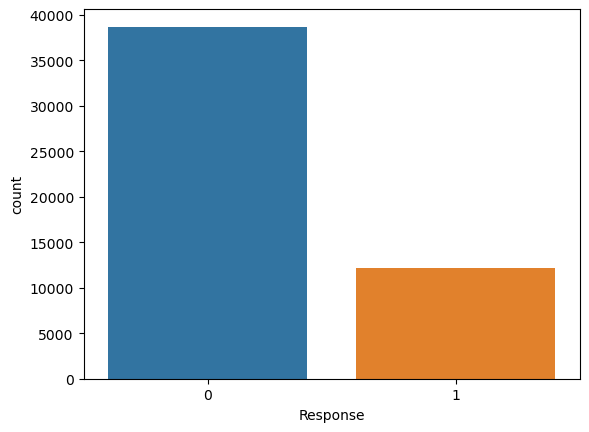

In [15]:
# Show the Response column values
sns.countplot(data = data, x = 'Response')

<AxesSubplot: xlabel='City_Code', ylabel='count'>

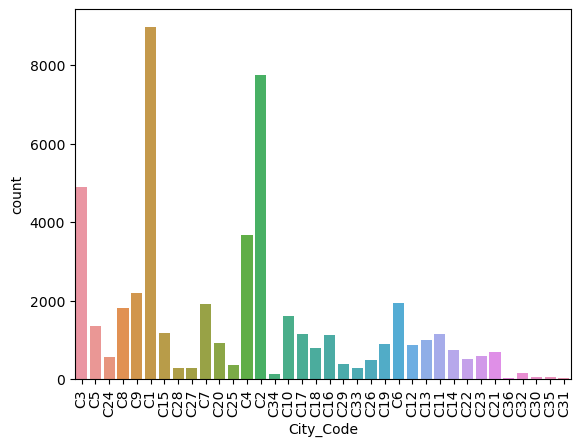

In [16]:
# Show the Values of City_Code Column
chart=sns.countplot(data=data, x='City_Code')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #Rotate Labels by 90° to be visible
chart

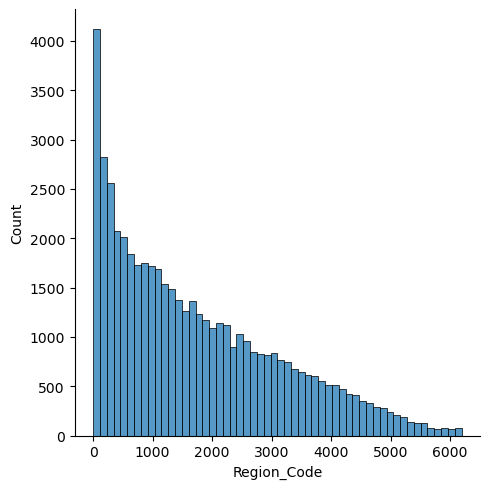

In [17]:
# Show the values of the Region_Code
sns.displot(data['Region_Code'])

<AxesSubplot: xlabel='Accomodation_Type', ylabel='count'>

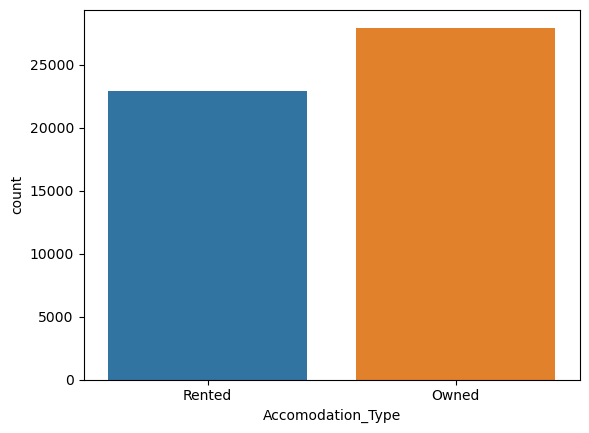

In [18]:
#Show the values of the column Accomodation_Type
sns.countplot(data = data, x = 'Accomodation_Type')

<AxesSubplot: xlabel='Reco_Insurance_Type', ylabel='count'>

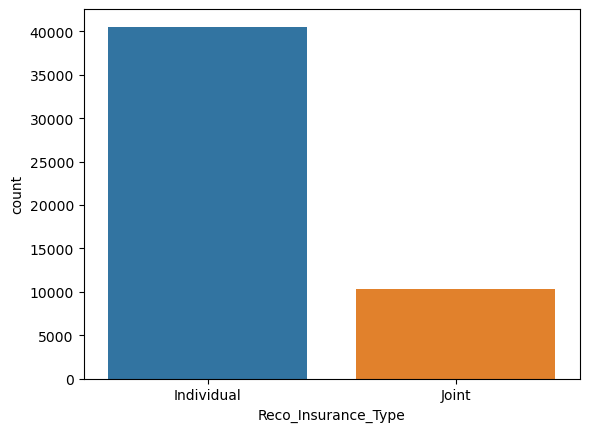

In [19]:
#Show the values of the column Reco_Insurance_Type
sns.countplot(data = data, x = 'Reco_Insurance_Type')

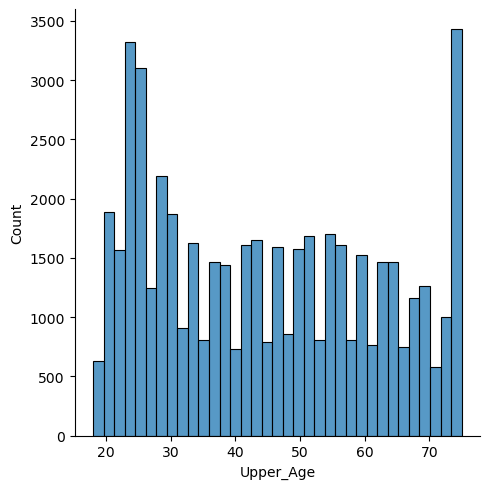

In [20]:
#Show the values of the column Upper_Age
sns.displot(data = data, x = 'Upper_Age')

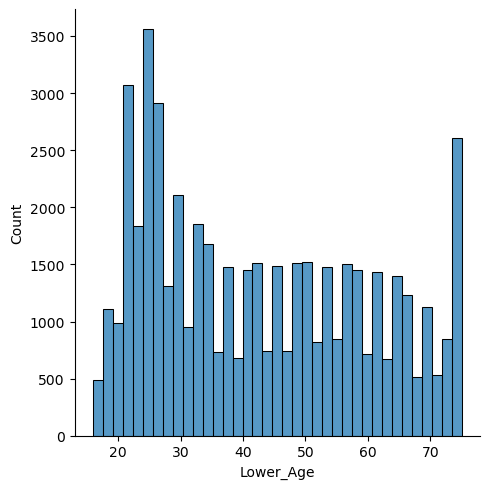

In [21]:
#Show the values of the column Lower_Age
sns.displot(data = data, x = 'Lower_Age')

<AxesSubplot: >

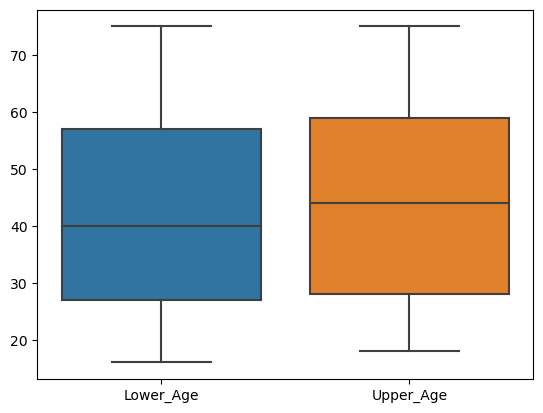

In [22]:
sns.boxplot(data=data[['Lower_Age','Upper_Age']]) #Create Boxplots for the Lower age And Upper Age columns

<AxesSubplot: xlabel='Is_Spouse', ylabel='count'>

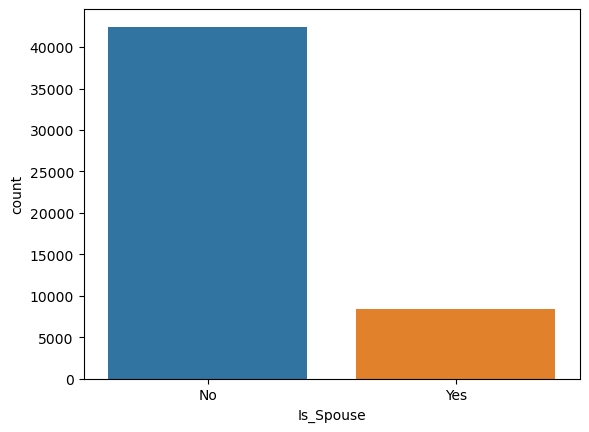

In [23]:
#Show the values of the column Is_Spouse
sns.countplot(data = data, x = 'Is_Spouse')

<AxesSubplot: xlabel='Health Indicator', ylabel='count'>

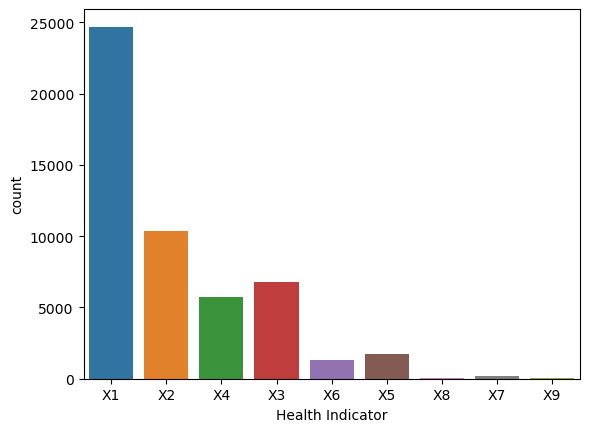

In [24]:
#Show the values of the column Health Indicator
sns.countplot(data = data, x = 'Health Indicator')

<AxesSubplot: xlabel='Holding_Policy_Duration', ylabel='count'>

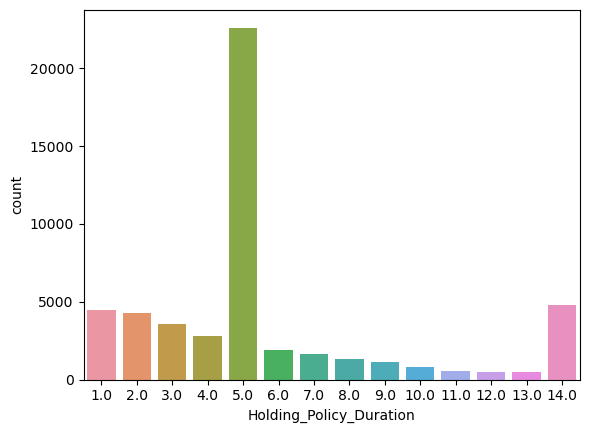

In [25]:
#Show the values of the column Holding_Policy_Duration
sns.countplot(data = data, x = 'Holding_Policy_Duration')

<AxesSubplot: xlabel='Holding_Policy_Type', ylabel='count'>

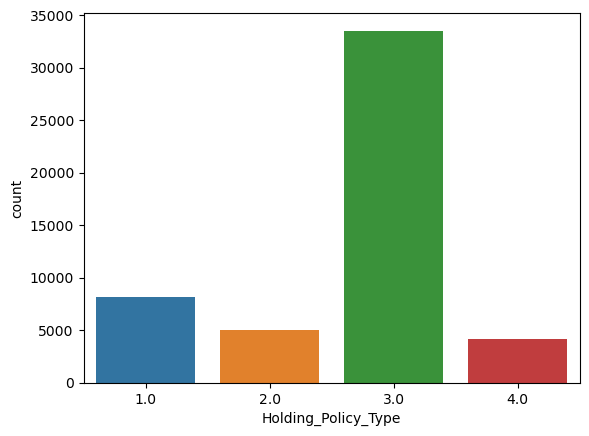

In [26]:
#Show the values of the column Holding_Policy_Type
sns.countplot(x = 'Holding_Policy_Type', data = data)

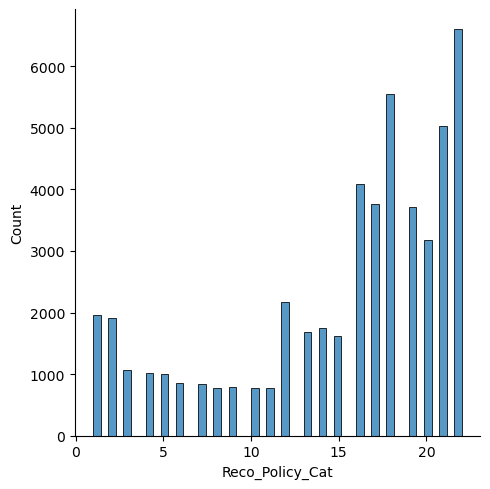

In [27]:
#Show the values of the column Reco_Policy_Cat
sns.displot(x = 'Reco_Policy_Cat', data = data)

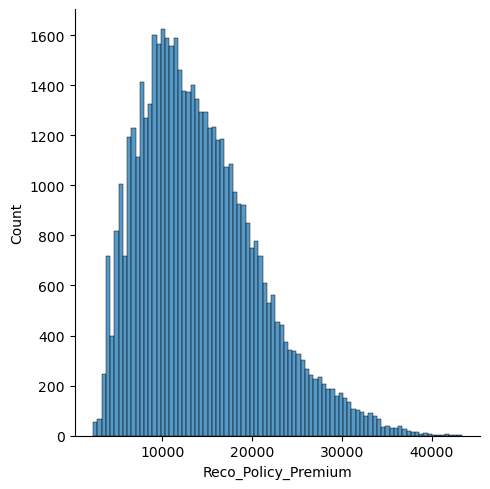

In [28]:
#Show the values of the column Reco_Policy_Premium
sns.displot(x = 'Reco_Policy_Premium', data = data)

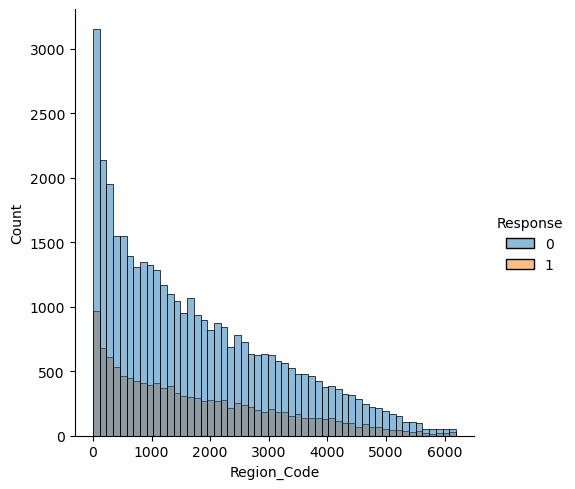

In [29]:
# Region_Code vs Response
sns.displot(x = 'Region_Code', data = data, hue = 'Response')

<AxesSubplot: xlabel='Accomodation_Type', ylabel='count'>

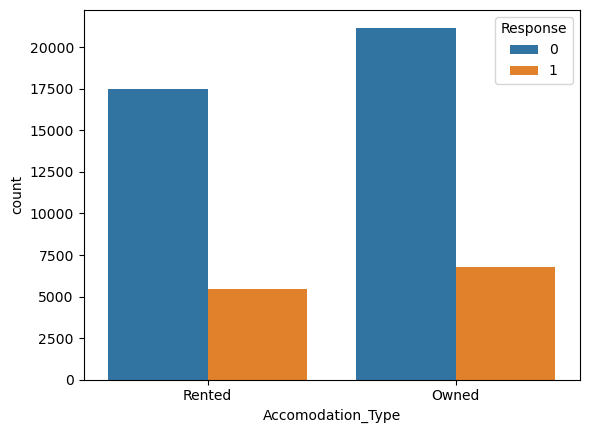

In [30]:
# Accomodation_Type vs Response
sns.countplot( x = 'Accomodation_Type', data = data, hue = 'Response')

<AxesSubplot: xlabel='Reco_Insurance_Type', ylabel='count'>

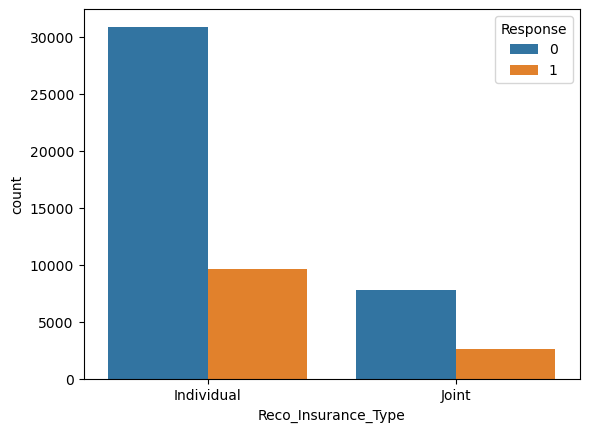

In [31]:
# Reco_Insurance_Type vs Response
sns.countplot(x = 'Reco_Insurance_Type', data = data, hue = 'Response')

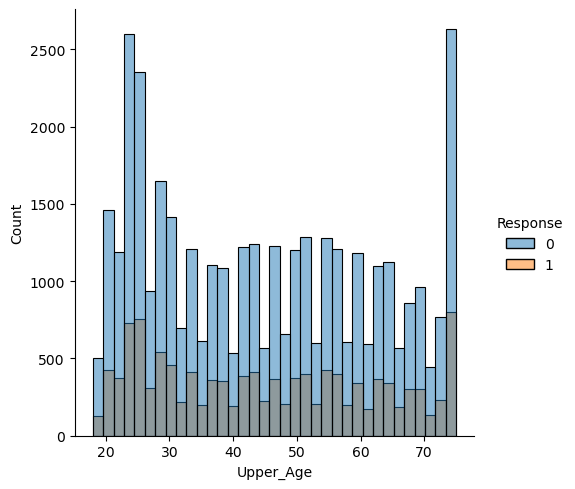

In [32]:
# Upper_Age vs Response
sns.displot(x = 'Upper_Age', data = data, hue = 'Response')

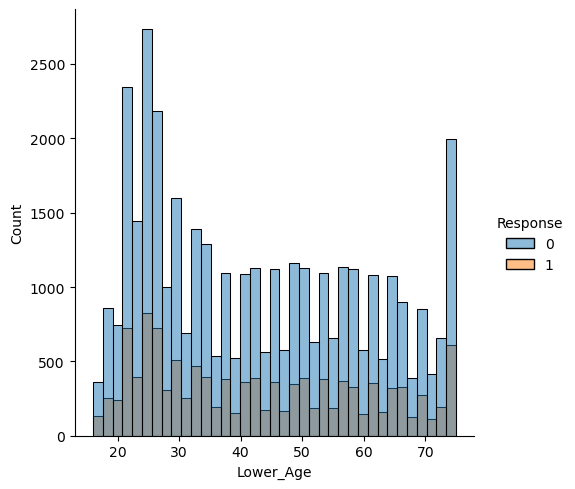

In [33]:
# Lower_Age vs Response
sns.displot(x = 'Lower_Age', data = data, hue = 'Response')

<AxesSubplot: xlabel='Is_Spouse', ylabel='count'>

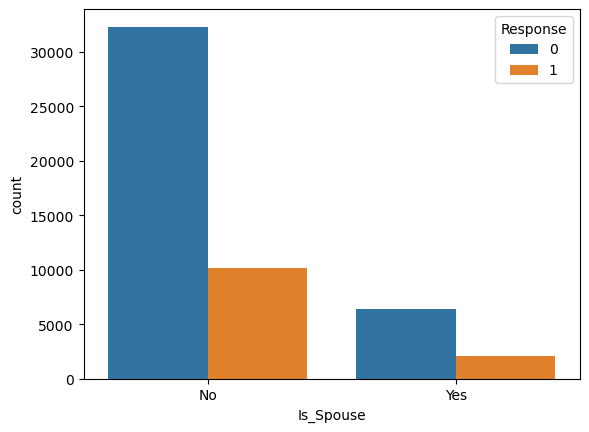

In [34]:
# Is_Spouse vs Response
sns.countplot(x = 'Is_Spouse', data = data, hue = 'Response')

<AxesSubplot: xlabel='Health Indicator', ylabel='count'>

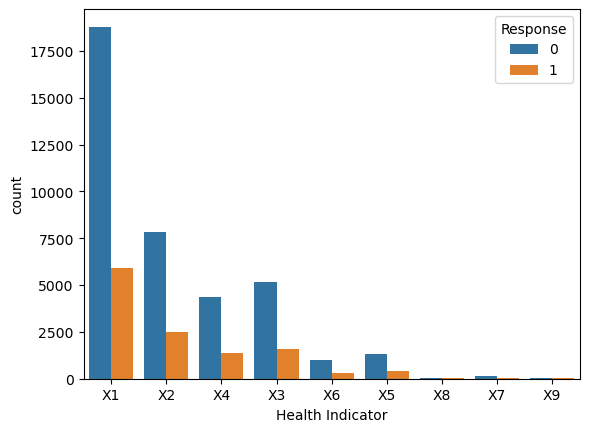

In [35]:
# Health Indicator vs Response
sns.countplot(x = 'Health Indicator', data = data, hue = 'Response')

<AxesSubplot: xlabel='Holding_Policy_Duration', ylabel='count'>

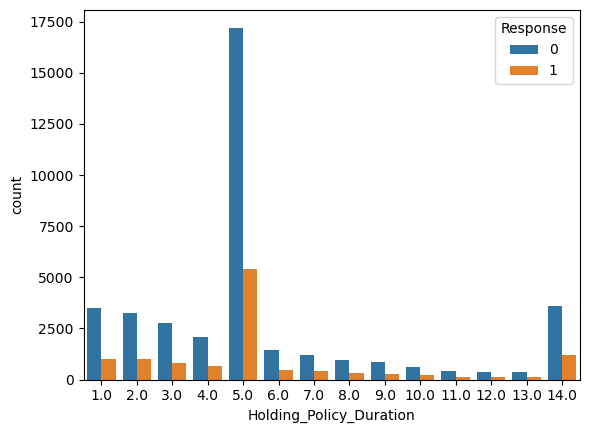

In [36]:
# Holding_Policy_Duration vs Response
sns.countplot(x = 'Holding_Policy_Duration', data = data, hue = 'Response')

<AxesSubplot: xlabel='Holding_Policy_Type', ylabel='count'>

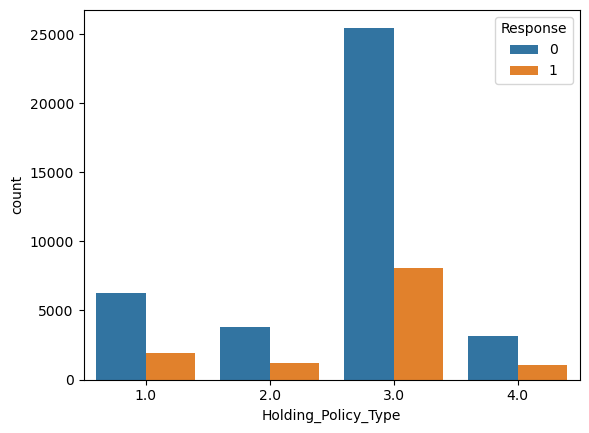

In [37]:
# Holding_Policy_Type vs Response
sns.countplot(x = 'Holding_Policy_Type', data = data, hue = 'Response')

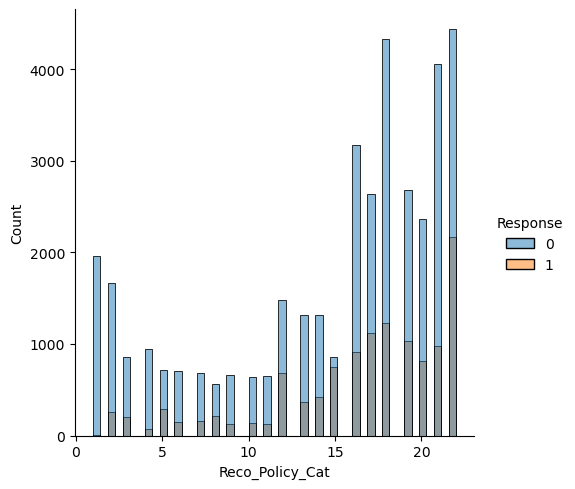

In [38]:
# Reco_Policy_Cat vs Response 
sns.displot( x = 'Reco_Policy_Cat', data = data, hue = 'Response')

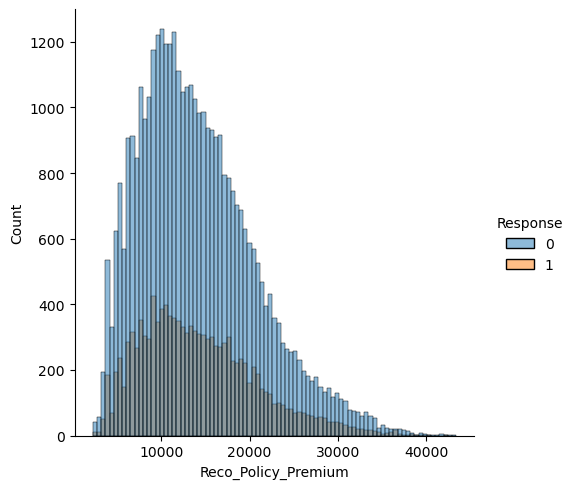

In [39]:
# Reco_Policy_Premium vs Response
sns.displot(x = 'Reco_Policy_Premium', data = data, hue = 'Response')

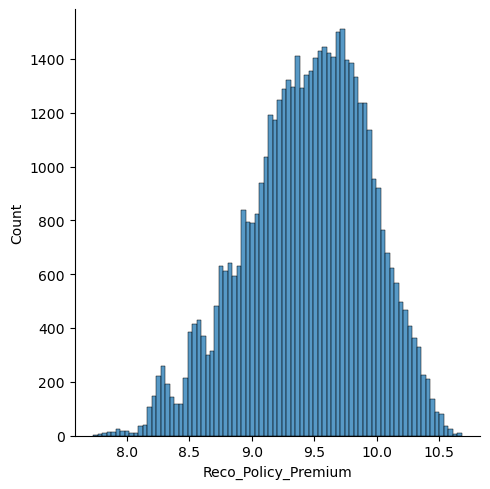

In [40]:
log1p = np.log1p(data['Reco_Policy_Premium'])
sns.displot(log1p)

<AxesSubplot: >

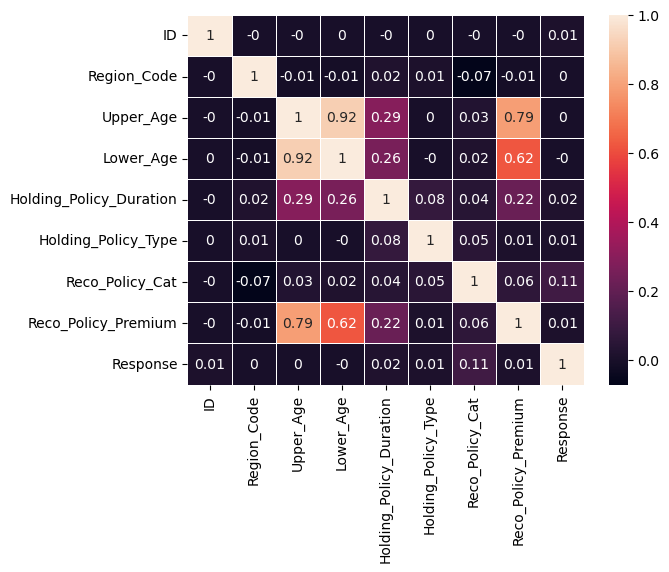

In [41]:
# Correlation Matrix
corr = data.corr().round(2)
sns.heatmap(corr, annot = True, linewidths= 0.7)

## IV. Data Preparation

In [42]:
data.drop(['ID', 'Lower_Age'], axis = 1, inplace = True) #Remove the ID and Lower_Age columns as we don't
#need the ID column and Lower_Age has a very strong correlation with the Upper_Age so we'll use that one

In [43]:
# We are grouping X6,X7,X8,X9 into a single group due to low value count
data['Health Indicator'].replace(('X1','X2','X3','X4','X5','X6','X7','X8','X9'), (0,1,2,3,4,4,4,4,4), inplace = True)

# Grouping 10 areas into 1 area
data['City_Code'].replace(('C1','C2','C3','C4','C5','C6','C7','C8','C9','C10',
                           'C11','C12','C13','C14','C15','C16','C17','C18','C19','C20',
                           'C21','C22','C23','C24','C25','C26','C27','C28','C29','C30',
                           'C31','C32','C33','C34','C35','C36'), (0,0,0,0,0,0,0,0,0,0,
                                                            1,1,1,1,1,1,1,1,1,1,
                                                            2,2,2,2,2,2,2,2,2,2,
                                                            3,3,3,3,3,3), inplace = True)
# Replacing Binary Values (Yes,No) (Individual,Joint) (Owned,Rented) by 0 and 1
data['Is_Spouse'].replace(('Yes','No'), (1,0), inplace = True)
data['Reco_Insurance_Type'].replace(('Individual', 'Joint'), (1,0), inplace = True)
data['Accomodation_Type'].replace(('Owned','Rented'), (0,1), inplace = True)

## V. Modeling

### 1. Splitting into X and Y (Train and Test)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [45]:
X = data.drop(['Response'], axis = 1) #X are all features after removing the column Response
Y = data['Response'] #Y is the Traget whixh is the Response column 
#which contains either 1 (Accepted) or 0 (Refused)

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Standardize the Data -> Feature Scaling

In [47]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0) #Split the data
#into 4 parts xtrain, xtest, ytrain, ytest

In [48]:
xtrain_sc, xtest_sc, ytrain_sc, ytest_sc = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0) #Split the data

### 2. K-Nearest Neighbor

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #Create a KneighborsClassifier with 3 neighbors to consider 

In [50]:
knn.fit(xtrain_sc,ytrain_sc)  #fit the knn to the scaled data as it uses distance

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred_knn = knn.predict(xtest_sc) #predict the Y of the test data

Text(0, 0.5, 'True Positive rate')

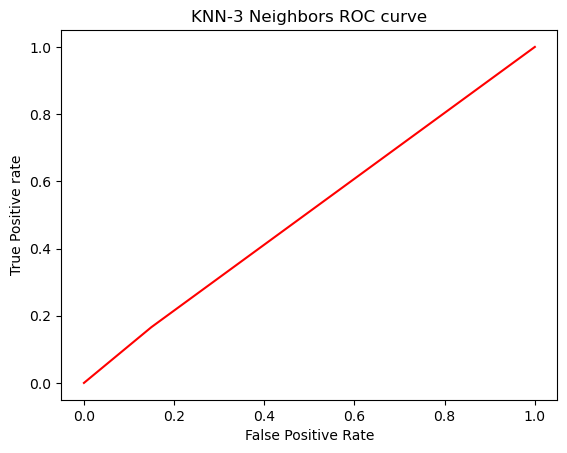

In [52]:
# ROC Curve
fpr, tpr, thresh = roc_curve(ytest, y_pred_knn, pos_label=1)
plt.plot(fpr, tpr, color='red', label='KNN-3 Neighbors')
plt.style.use('seaborn-deep')
plt.title('KNN-3 Neighbors ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')


In [53]:
print(f"Accuracy Score: {round(accuracy_score(ytest_sc, y_pred_knn)*100,2)}\n") # Show the Accuracy
print(f"Classification Report:\n {classification_report(ytest_sc, y_pred_knn)}\n") #Show the Classification Report
print(f"Confusion Matrix:\n {confusion_matrix(ytest_sc, y_pred_knn)}") #Show the Confusion Matrix

Accuracy Score: 68.1

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80      7658
           1       0.27      0.17      0.20      2519

    accuracy                           0.68     10177
   macro avg       0.51      0.51      0.50     10177
weighted avg       0.64      0.68      0.65     10177


Confusion Matrix:
 [[6513 1145]
 [2101  418]]


### 3. DecisionTree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() #Make an instance of Decision Tree called dt with a max depth of 10

In [55]:
model=dt.fit(xtrain,ytrain) #Fit the Decision Tree to the train set

In [56]:
y_pred_dt = dt.predict(xtest) #Predict the Target for the test set

Text(0, 0.5, 'True Positive rate')

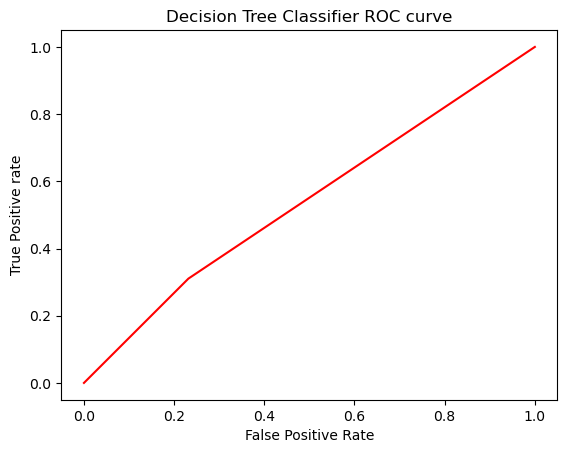

In [57]:
# ROC Curve
fpr, tpr, thresh = roc_curve(ytest, y_pred_dt, pos_label=1)
plt.plot(fpr, tpr, color='red', label='Decision Tree Classifier')
plt.style.use('seaborn-deep')
plt.title('Decision Tree Classifier ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')


In [58]:
print(f"Accuracy Score: {round(accuracy_score(ytest, y_pred_dt)*100,2)}\n") # Show the Accuracy
print(f"Classification Report:\n {classification_report(ytest, y_pred_dt)}\n") #Show the Classification Report
print(f"Confusion Matrix:\n {confusion_matrix(ytest, y_pred_dt)}") #Show the Confusion Matrix

Accuracy Score: 65.5

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      7658
           1       0.31      0.31      0.31      2519

    accuracy                           0.66     10177
   macro avg       0.54      0.54      0.54     10177
weighted avg       0.66      0.66      0.66     10177


Confusion Matrix:
 [[5884 1774]
 [1737  782]]


### 4. RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', max_depth = 30, max_features = xtrain.shape[1])
model.fit(xtrain , ytrain)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features=11,
                       n_estimators=5)

Text(0, 0.5, 'True Positive rate')

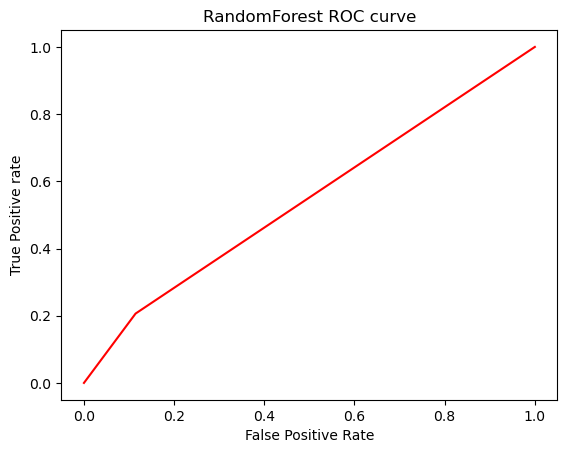

In [60]:
# ROC Curve
ypred = model.predict(xtest)
fpr, tpr, thresh = roc_curve(ytest, ypred, pos_label=1)
plt.plot(fpr, tpr, color='red', label='Random Forest')
plt.style.use('seaborn-deep')
plt.title('RandomForest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')


In [61]:
print(f"Accuracy Score: {round(accuracy_score(ytest, ypred)*100,2)}\n")
print(f"Classification Report:\n {classification_report(ytest, ypred)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(ytest, ypred)}")

Accuracy Score: 71.74

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83      7658
           1       0.37      0.21      0.27      2519

    accuracy                           0.72     10177
   macro avg       0.57      0.55      0.55     10177
weighted avg       0.67      0.72      0.69     10177


Confusion Matrix:
 [[6781  877]
 [1999  520]]


### 5. Support vector Machine

In [62]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')

In [63]:
linear_SVM.fit(xtrain_sc,ytrain_sc)
ypredSVM = linear_SVM.predict(xtest_sc)

Text(0, 0.5, 'True Positive rate')

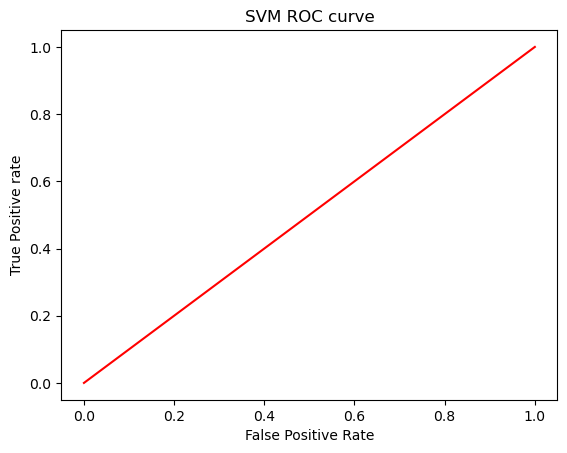

In [64]:
# ROC Curve
fpr, tpr, thresh = roc_curve(ytest, ypredSVM, pos_label=1)
plt.plot(fpr, tpr, color='red', label='SVM')
plt.style.use('seaborn-deep')
plt.title('SVM ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

In [65]:
print(f"Accuracy Score: {round(accuracy_score(ytest, ypredSVM)*100,2)}\n")
print(f"Classification Report:\n {classification_report(ytest, ypredSVM)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(ytest, ypredSVM)}")

Accuracy Score: 75.25

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      7658
           1       0.00      0.00      0.00      2519

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177


Confusion Matrix:
 [[7658    0]
 [2519    0]]


### 6. Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [67]:
lr.fit(xtrain_sc,ytrain_sc)
ypredlr = lr.predict(xtest_sc)

Text(0, 0.5, 'True Positive rate')

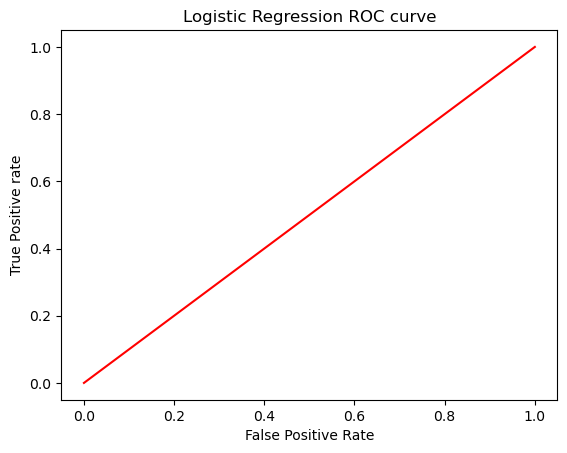

In [68]:
# ROC Curve
fpr, tpr, thresh = roc_curve(ytest, ypredlr, pos_label=1)
plt.plot(fpr, tpr, color='red', label='Logistic Regression')
plt.style.use('seaborn-deep')
plt.title('Logistic Regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

In [69]:
print(f"Accuracy Score: {round(accuracy_score(ytest, ypredlr)*100,2)}\n")
print(f"Classification Report:\n {classification_report(ytest, ypredlr)}\n")
print(f"Confusion Matrix:\n {confusion_matrix(ytest, ypredlr)}")

Accuracy Score: 75.25

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      7658
           1       0.00      0.00      0.00      2519

    accuracy                           0.75     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.75      0.65     10177


Confusion Matrix:
 [[7658    0]
 [2519    0]]


### 7. Summary

In [70]:
accuracies={}
accuracies["Logistic Regression"]=(round(accuracy_score(ytest, ypredlr)*100,2))
accuracies["Random Forest"]=round(accuracy_score(ytest, ypred)*100,2)
accuracies["Support Vector Machine"]=round(accuracy_score(ytest, ypredSVM)*100,2)
accuracies["Decision Tree"]=round(accuracy_score(ytest, y_pred_dt)*100,2)
accuracies["KNN"]=round(accuracy_score(ytest, y_pred_knn)*100,2)

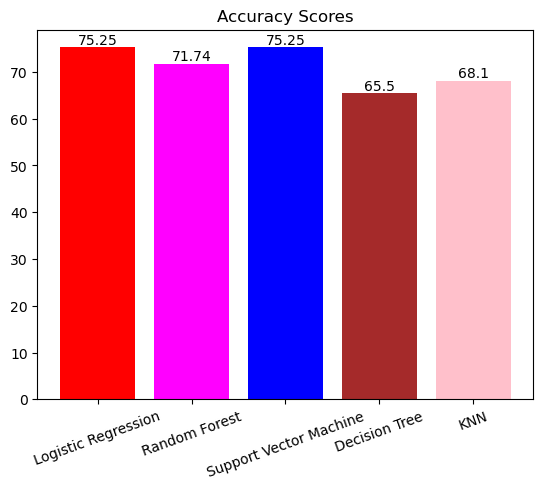

In [71]:
names = list(accuracies.keys())
values = list(accuracies.values())
fig, ax = plt.subplots()
bars = ax.bar(range(len(accuracies)), values, tick_label=names,color=['red','magenta','blue','brown','pink'])
plt.xticks(rotation=20)
ax.bar_label(bars)
plt.title('Accuracy Scores')

plt.show()

#### Using Accuracies, we notice that SVM and Logistic Regression provide the most accuracy (75.25) but it does not mean that these are the best algorithms

Text(0, 0.5, 'True Positive rate')

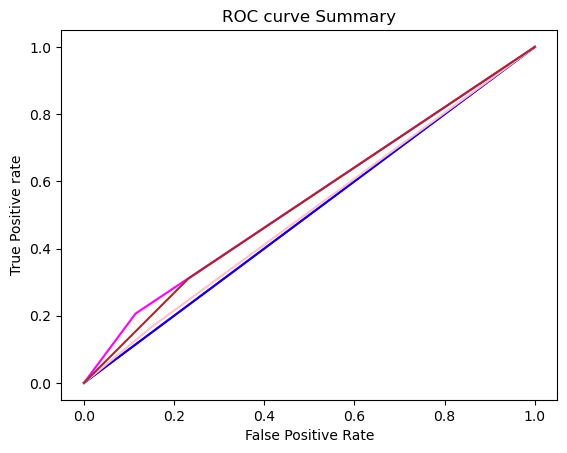

In [72]:

fpr, tpr, thresh = roc_curve(ytest, ypredlr)
plt.plot(fpr, tpr, color='red', label='Logistic Regression')
fpr, tpr, thresh = roc_curve(ytest, ypred)
plt.plot(fpr, tpr, color='magenta', label='Random Forest')
fpr, tpr, thresh = roc_curve(ytest, ypredSVM)
plt.plot(fpr, tpr, color='blue', label='SVM Regression')
fpr, tpr, thresh = roc_curve(ytest, y_pred_knn)
plt.plot(fpr, tpr, color='pink', label='KNN')
fpr, tpr, thresh = roc_curve(ytest, y_pred_dt)
plt.plot(fpr, tpr, color='brown', label='Decision Tree')
plt.style.use('seaborn-deep')
plt.title('ROC curve Summary')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')


#### -> It looks like Brown has the most Roc Curve surface therefore KNN is the algorithm to choose for our dataset